In [ ]:
import zipfile
import os

dataset_name = 'traffic-sign-dataset-gtsrb-gtsdb'
zip_file_path = f'{dataset_name}.zip'
unzip_path = f'./{dataset_name}'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

# You can remove the zip file after extraction if you want
# os.remove(zip_file_path)

In [ ]:
# Install Essential Libraries
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 115.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
# Import Essential Libraries
import os
import random
import torch
import shutil
import pandas as pd
from PIL import Image
import cv2
import math
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
data_path = '/content/traffic-sign-dataset-gtsrb-gtsdb/GTSRB/GTSRB/'
train_path = data_path + 'images/Train/'
test_path = data_path + 'images/Test/'
df_meta = pd.read_csv(data_path + 'Meta.csv')
df_train = pd.read_csv(data_path + 'Train.csv')
df_test = pd.read_csv(data_path + 'Test.csv')

In [ ]:
print("Min. Class Label: {}".format(df_meta.ClassId.min()))
print("Max Class Label: {}".format(df_meta.ClassId.max()))
print("Total Class Labels: {}".format(len(df_meta.ClassId.unique())))

Min. Class Label: 0
Max Class Label: 42
Total Class Labels: 43


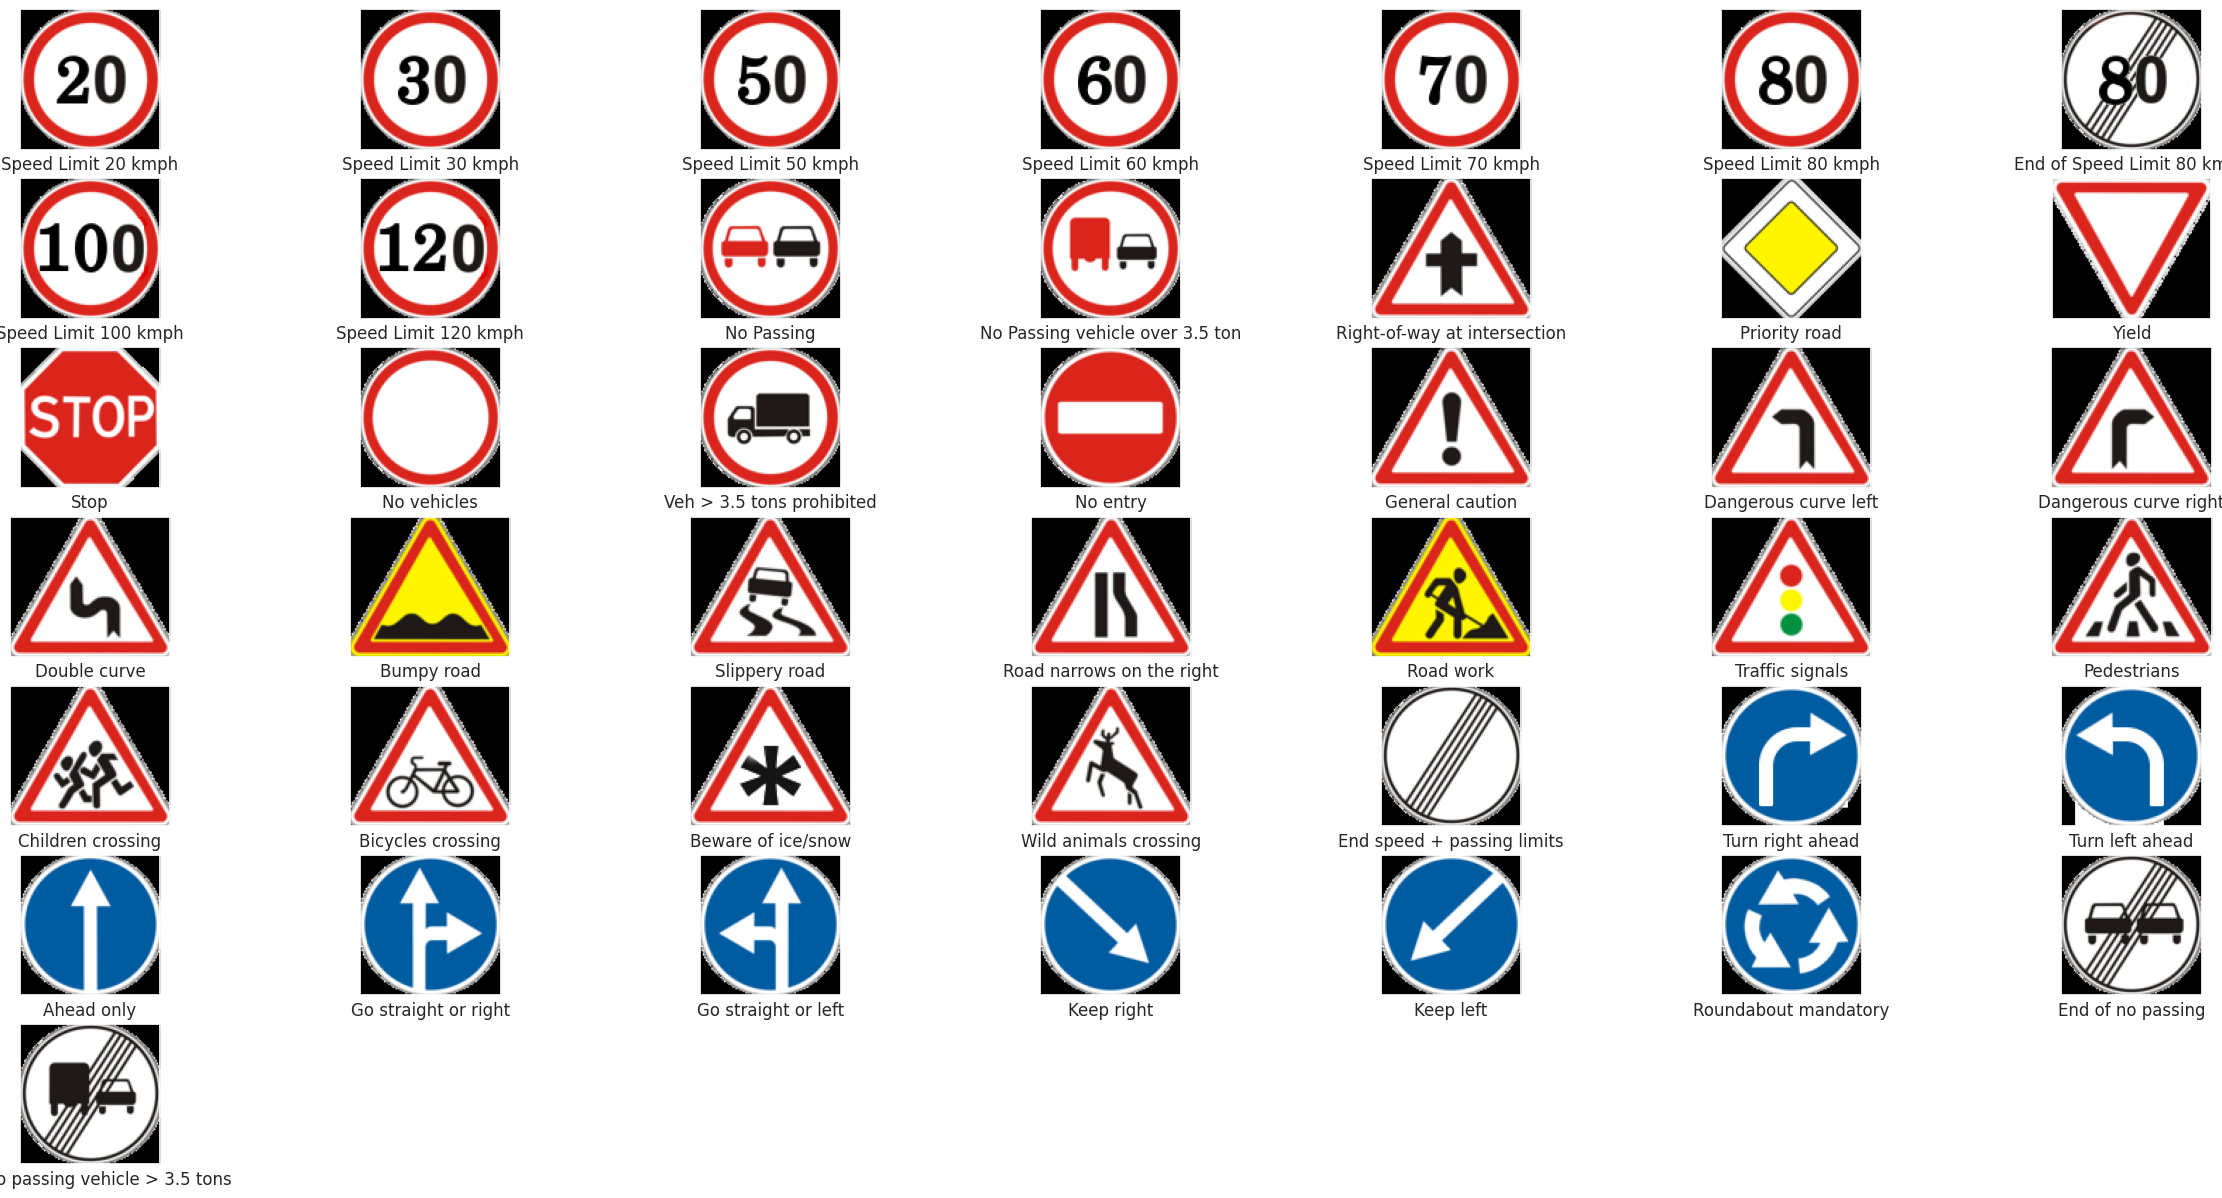

In [ ]:
num_classes = len(df_meta.ClassId.unique())
class_dict = {}
class_labels = list(range(num_classes))
# Speed Class 0-9
speed_class = ['Speed Limit ' + item for item in [speed + ' kmph' for speed in ['20', '30', '50', '60', '70', '80']]]\
            + ['End of Speed Limit 80 kmph']
speed_class+= ['Speed Limit ' + item for item in [speed + ' kmph' for speed in ['100', '120']]]
speed_class
# 10, 11 No Passing
no_pass = ['No Passing' + item for item in ['', ' vehicle over 3.5 ton']]
# 12-43
rest = ['Right-of-way at intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Veh > 3.5 tons prohibited',\
            'No entry', 'General caution', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'Bumpy road',
            'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing',
            'Bicycles crossing', 'Beware of ice/snow','Wild animals crossing', 'End speed + passing limits', 'Turn right ahead',
            'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left',
            'Roundabout mandatory', 'End of no passing', 'End no passing vehicle > 3.5 tons']
class_values = speed_class + no_pass + rest
class_dict = {keys:values for keys,values in zip(class_labels, class_values)}


sortFunction = lambda x: int(os.path.basename(x)[:-4])
plt.figure(figsize = (30, 15))
for i, imagename in enumerate(sorted(glob.glob(data_path + 'Meta/' + '*.*'), key = sortFunction)):
    plt.subplot(7, 7, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_dict[i])
    image = cv2.imread(imagename)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
df_train.shape

(39209, 8)

In [ ]:
df_train.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

In [ ]:
df_train.describe()

Width        Height        Roi.X1        Roi.Y1        Roi.X2  \
count  39209.000000  39209.000000  39209.000000  39209.000000  39209.000000   
mean      50.835880     50.328930      5.999515      5.962381     45.197302   
std       24.306933     23.115423      1.475493      1.385440     23.060157   
min       25.000000     25.000000      0.000000      5.000000     20.000000   
25%       35.000000     35.000000      5.000000      5.000000     29.000000   
50%       43.000000     43.000000      6.000000      6.000000     38.000000   
75%       58.000000     58.000000      6.000000      6.000000     53.000000   
max      243.000000    225.000000     20.000000     20.000000    223.000000   

             Roi.Y2       ClassId  
count  39209.000000  39209.000000  
mean      44.728379     15.788390  
std       21.971145     12.013238  
min       20.000000      0.000000  
25%       30.000000      5.000000  
50%       38.000000     12.000000  
75%       52.000000     25.000000  
max      205.000000     42.000000

In [ ]:
# Create a dictionary which consists of the labels as keys and the number of samples as values
train_dict = {}
train_dict = {keys:values for keys,values in zip(df_train.ClassId.value_counts().index, df_train.ClassId.value_counts().tolist())}

Text(0.5, 1.0, 'Class Distribution for Training data')

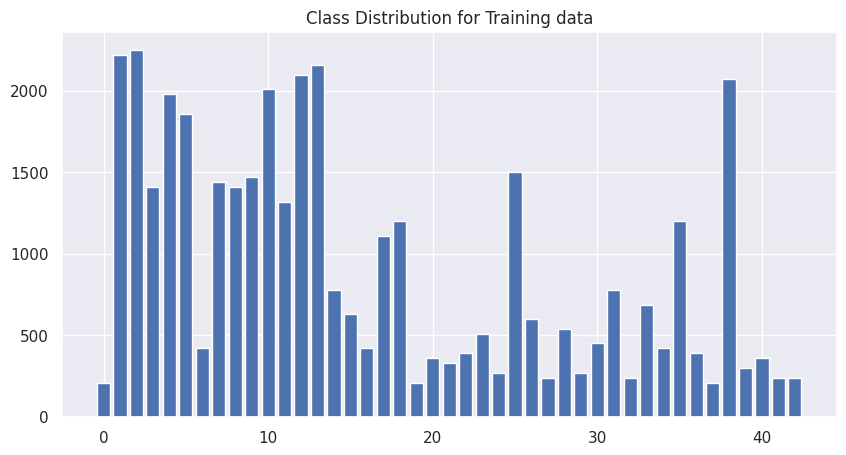

In [ ]:
plt.figure(figsize = (10 ,5))
plt.bar(train_dict.keys(), train_dict.values())
plt.title('Class Distribution for Training data')

In [ ]:
df_test.shape

(12630, 8)

In [ ]:
df_test.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png

In [ ]:
df_test.describe()

Width        Height        Roi.X1        Roi.Y1        Roi.X2  \
count  12630.000000  12630.000000  12630.000000  12630.000000  12630.000000   
mean      50.507759     50.364450      5.998021      5.982423     44.864450   
std       25.088483     23.698908      1.543954      1.427424     23.776102   
min       25.000000     25.000000      1.000000      5.000000     20.000000   
25%       34.000000     35.000000      5.000000      5.000000     29.000000   
50%       43.000000     43.000000      6.000000      6.000000     38.000000   
75%       58.000000     57.000000      6.000000      6.000000     53.000000   
max      266.000000    232.000000     23.000000     19.000000    244.000000   

             Roi.Y2       ClassId  
count  12630.000000  12630.000000  
mean      44.758116     15.551069  
std       22.494697     11.947123  
min       20.000000      0.000000  
25%       29.000000      5.000000  
50%       38.000000     12.000000  
75%       52.000000     25.000000  
max      212.000000     42.000000

Text(0.5, 1.0, 'Class Distribution of Test Data')

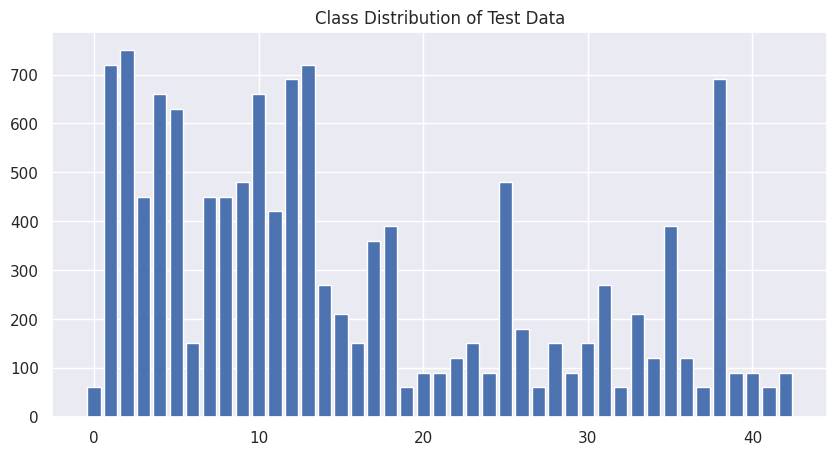

In [ ]:
# Create a test_dict with keys as the labels and values as the value_counts
test_dict = {}
test_dict = {keys:values for keys,values in zip(df_test.ClassId.value_counts().index, df_test.ClassId.value_counts().tolist())}

plt.figure(figsize = (10, 5))
plt.bar(test_dict.keys(), test_dict.values())
plt.title("Class Distribution of Test Data")

In [ ]:
print(df_train.Path.duplicated().unique())
print(df_test.Path.duplicated().unique())

[False]
[False]


After an extensive EDA, we will prepare our dataset from the data/Train and data/Test. The Train folder consists of 43 folders from 0 to 42. Each folder consists of images. So we will prepare our training data by iterating over these folders.

For the Test data, the folder consists of only images and the ground-truth is given in the dataframe df_test, we need to predict the labels for each of these images

Before training the model, we will split the Train dataset into train and val using 80-20 stratified split to retain the ratio of balance. train and test datasets are already in an approximate split of 75-25. This will lead to an overall split of:
- Train 60%
- Val 15%
- Test 25%


In [ ]:
yaml_content = """
train: /content/traffic-sign-dataset-gtsrb-gtsdb/GTSRB/GTSRB/images/Train
val: /content/traffic-sign-dataset-gtsrb-gtsdb/GTSRB/GTSRB/images/Test
nc: 43

augmentation:
  mosaic: 1.0
  mixup: 0.5
  hsv_h: 0.015
  hsv_s: 0.7
  hsv_v: 0.4
  degrees: 45.0
  translate: 0.2
  scale: 0.5
  shear: 0.1
  perspective: 0.001

names:
  0: "Speed Limit 20 kmph"
  1: "Speed Limit 30 kmph"
  2: "Speed Limit 50 kmph"
  3: "Speed Limit 60 kmph"
  4: "Speed Limit 70 kmph"
  5: "Speed Limit 80 kmph"
  6: "End of Speed Limit 80 kmph"
  7: "Speed Limit 100 kmph"
  8: "Speed Limit 120 kmph"
  9: "No Passing"
  10: "No Passing vehicle over 3.5 ton"
  11: "Right-of-way at intersection"
  12: "Priority road"
  13: "Yield"
  14: "Stop"
  15: "No vehicles"
  16: "Veh > 3.5 tons prohibited"
  17: "No entry"
  18: "General caution"
  19: "Dangerous curve left"
  20: "Dangerous curve right"
  21: "Double curve"
  22: "Bumpy road"
  23: "Slippery road"
  24: "Road narrows on the right"
  25: "Road work"
  26: "Traffic signals"
  27: "Pedestrians"
  28: "Children crossing"
  29: "Bicycles crossing"
  30: "Beware of ice/snow"
  31: "Wild animals crossing"
  32: "End speed + passing limits"
  33: "Turn right ahead"
  34: "Turn left ahead"
  35: "Ahead only"
  36: "Go straight or right"
  37: "Go straight or left"
  38: "Keep right"
  39: "Keep left"
  40: "Roundabout mandatory"
  41: "End of no passing"
  42: "End no passing vehicle > 3.5 tons"
"""

with open("gtsrb_classification.yaml", "w") as f:
    f.write(yaml_content)

In [ ]:
from ultralytics import YOLO


model = YOLO('yolov8n.pt')  # Use yolov8n (Nano) for minimal resource usage


model.train(
    data='gtsrb_classification.yaml',
    epochs=15,              # Increase epochs (10 is too low for convergence)
    imgsz=416,
    batch=5,               # Increase batch size if GPU memory allows
    lr0=0.05,              # Learning rate (default: 0.01)
    weight_decay=0.001,    # Regularization (prevents overfitting)
    augment=True,           # Enable mosaics, mixup, etc.
    patience=10,            # Early stopping if no improvement
    pretrained=True         # Ensure transfer learning
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 398MB/s]


Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=5, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=gtsrb_classification.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.05, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=True,

100%|██████████| 755k/755k [00:00<00:00, 90.2MB/s]

Overriding model.yaml nc=80 with nc=43

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 129 layers, 3,019,233 parameters, 3,019,217 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 382MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6.6±2.4 MB/s, size: 6.5 KB)


train: Scanning /content/traffic-sign-dataset-gtsrb-gtsdb/GTSRB/GTSRB/labels/Train... 39209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39209/39209 [00:19<00:00, 2026.54it/s]


train: New cache created: /content/traffic-sign-dataset-gtsrb-gtsdb/GTSRB/GTSRB/labels/Train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6.6±4.6 MB/s, size: 8.1 KB)


val: Scanning /content/traffic-sign-dataset-gtsrb-gtsdb/GTSRB/GTSRB/labels/Test... 12630 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12630/12630 [00:06<00:00, 1941.73it/s]


val: New cache created: /content/traffic-sign-dataset-gtsrb-gtsdb/GTSRB/GTSRB/labels/Test.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000213, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001015625), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15     0.379G     0.7768      2.605       1.23          7        416: 100%|██████████| 7842/7842 [12:30<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:32<00:00, 13.60it/s]


                   all      12630      12630      0.669      0.559      0.627      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15     0.396G     0.6086      1.354      1.113         10        416: 100%|██████████| 7842/7842 [12:00<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:33<00:00, 13.52it/s]


                   all      12630      12630      0.816      0.887      0.864      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15     0.414G      0.567      1.055      1.082          9        416: 100%|██████████| 7842/7842 [11:53<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:27<00:00, 14.38it/s]


                   all      12630      12630      0.846      0.933      0.912      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15     0.432G     0.5401     0.9176      1.063         14        416: 100%|██████████| 7842/7842 [11:39<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:28<00:00, 14.19it/s]


                   all      12630      12630      0.895       0.95      0.908      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15     0.449G     0.5107     0.8254      1.045         10        416: 100%|██████████| 7842/7842 [11:34<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:30<00:00, 14.02it/s]


                   all      12630      12630      0.896      0.957      0.909      0.837
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15     0.465G     0.5092     0.3975      1.125          4        416: 100%|██████████| 7842/7842 [11:20<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:28<00:00, 14.21it/s]


                   all      12630      12630      0.892      0.955      0.929      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      0.48G     0.4798       0.33      1.099          4        416: 100%|██████████| 7842/7842 [11:26<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:29<00:00, 14.17it/s]


                   all      12630      12630      0.918       0.95       0.95      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15     0.498G     0.4636     0.2972      1.085          4        416: 100%|██████████| 7842/7842 [11:22<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:27<00:00, 14.40it/s]


                   all      12630      12630      0.906      0.963      0.945      0.886

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15     0.516G     0.4526     0.2728      1.076          4        416: 100%|██████████| 7842/7842 [11:24<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:29<00:00, 14.04it/s]


                   all      12630      12630       0.93      0.959      0.962      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15     0.531G     0.4413      0.251      1.066          4        416: 100%|██████████| 7842/7842 [11:22<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:27<00:00, 14.36it/s]


                   all      12630      12630      0.932      0.948      0.956        0.9

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15     0.549G     0.4314     0.2352      1.057          4        416: 100%|██████████| 7842/7842 [11:28<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:31<00:00, 13.80it/s]


                   all      12630      12630      0.939      0.944      0.964       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15     0.566G      0.425     0.2235      1.053          4        416: 100%|██████████| 7842/7842 [11:28<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:26<00:00, 14.67it/s]


                   all      12630      12630      0.942      0.938      0.961       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15     0.584G     0.4158     0.2105      1.047          4        416: 100%|██████████| 7842/7842 [11:27<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:30<00:00, 14.00it/s]


                   all      12630      12630      0.935      0.947       0.96      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15     0.602G     0.4094     0.2029      1.042          4        416: 100%|██████████| 7842/7842 [11:29<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:28<00:00, 14.31it/s]


                   all      12630      12630      0.935      0.949       0.96      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15     0.617G     0.4003     0.1926      1.035          4        416: 100%|██████████| 7842/7842 [11:26<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:25<00:00, 14.72it/s]


                   all      12630      12630      0.932       0.95       0.96      0.913

15 epochs completed in 3.272 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,014,033 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1263/1263 [01:41<00:00, 12.46it/s]


                   all      12630      12630      0.948      0.948      0.966      0.922
   Speed Limit 20 kmph         60         60      0.937          1      0.993      0.955
   Speed Limit 30 kmph        720        720      0.996      0.998      0.993      0.957
   Speed Limit 50 kmph        750        750      0.996      0.993      0.995      0.967
   Speed Limit 60 kmph        450        450      0.969      0.976      0.968      0.926
   Speed Limit 70 kmph        660        660          1      0.989      0.995      0.953
   Speed Limit 80 kmph        630        630      0.962      0.997      0.986      0.952
End of Speed Limit 80 kmph        150        150          1      0.957      0.995      0.921
  Speed Limit 100 kmph        450        450          1          1      0.995      0.958
  Speed Limit 120 kmph        450        450      0.999       0.94      0.993      0.948
            No Passing        480        480          1          1      0.995      0.955
No Passing vehicl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78417145e3d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.03

In [ ]:
 from ultralytics import YOLO

# Load your trained model
modela = YOLO('/content/runs/detect/train/weights/best.pt')

# Export to ONNX (optional but recommended for CPU)
modela.export(format='onnx', imgsz=416)  # ONNX is faster on CPU

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,014,033 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 47, 3549) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 11.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.59...
ONNX: export success ✅ 13.8s, saved as '/content/runs/detect/train/weights/best.onnx' (11.6 MB)

Export complete (14.3s)
Results saved to /content/runs/detect/train/weights
Predict:        

'/content/runs/detect/train/weights/best.onnx'

In [ ]:
from google.colab import files

# Download .pt and .onnx files
files.download('/content/runs/detect/train/weights/best.pt')  # PyTorch format
files.download('/content/runs/detect/train/weights/best.onnx')  # ONNX format

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/args.yaml (deflated 53%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 48%)
  adding: content/runs/detect/train/BoxPR_curve.png (deflated 12%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 24%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 17%)
  adding: content/runs/detect/train/BoxR_curve.png (deflated 9%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 25%)
  adding: content/runs/detect/train/train_batch39211.jpg (deflated 28%)
  adding: content/runs/detect/train/labels.jpg (deflated 52%)
  adding: content/runs/detect/train/train_batch39212.jpg (deflated 28%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 18%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 17%)
  adding: content/runs/detect/train/

In [ ]:
from google.colab import files
files.download("/content/runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
runs = pd.read_csv("/content/runs/detect/train/results.csv")

runs

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1    844.10         0.77684         2.60486         1.23037   
1       2   1658.09         0.60861         1.35400         1.11332   
2       3   2460.50         0.56699         1.05519         1.08155   
3       4   3249.45         0.54013         0.91764         1.06260   
4       5   4034.66         0.51066         0.82543         1.04451   
5       6   4804.43         0.50923         0.39755         1.12537   
6       7   5580.12         0.47984         0.33001         1.09938   
7       8   6350.93         0.46357         0.29720         1.08488   
8       9   7125.61         0.45261         0.27285         1.07614   
9      10   7896.44         0.44126         0.25101         1.06615   
10     11   8676.93         0.43136         0.23521         1.05732   
11     12   9451.73         0.42501         0.22354         1.05250   
12     13  10229.60         0.41581         0.21049         1.04695   
13     14  11007.90         0.40942         0.20294         1.04235   
14     15  11780.60         0.40033         0.19259         1.03481   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.66858            0.55886           0.62725   
1                0.81577            0.88735           0.86446   
2                0.84646            0.93300           0.91179   
3                0.89471            0.95010           0.90784   
4                0.89589            0.95705           0.90942   
5                0.89239            0.95461           0.92927   
6                0.91754            0.94997           0.94990   
7                0.90597            0.96316           0.94468   
8                0.92994            0.95894           0.96192   
9                0.93154            0.94799           0.95596   
10               0.93900            0.94450           0.96357   
11               0.94190            0.93818           0.96051   
12               0.93536            0.94738           0.96037   
13               0.93467            0.94941           0.96009   
14               0.93164            0.94966           0.95990   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0               0.54575       0.55381       0.92769       1.12290  0.000071   
1               0.76174       0.53331       0.51543       1.07254  0.000133   
2               0.82914       0.44387       0.40739       0.99477  0.000185   
3               0.83353       0.41779       0.35108       0.97259  0.000171   
4               0.83743       0.40950       0.31959       0.95863  0.000157   
5               0.85807       0.42136       0.30921       0.96460  0.000143   
6               0.88518       0.39526       0.28447       0.94446  0.000129   
7               0.88571       0.39082       0.27349       0.93674  0.000115   
8               0.90442       0.37917       0.25512       0.92758  0.000101   
9               0.90033       0.37815       0.25667       0.92847  0.000086   
10              0.91000       0.36636       0.24902       0.91775  0.000072   
11              0.90970       0.36133       0.25000       0.91315  0.000058   
12              0.91074       0.36097       0.24276       0.91170  0.000044   
13              0.91109       0.35595       0.24662       0.90978  0.000030   
14              0.91280       0.35178       0.24722       0.90661  0.000016   

      lr/pg1    lr/pg2  
0   0.000071  0.000071  
1   0.000133  0.000133  
2   0.000185  0.000185  
3   0.000171  0.000171  
4   0.000157  0.000157  
5   0.000143  0.000143  
6   0.000129  0.000129  
7   0.000115  0.000115  
8   0.000101  0.000101  
9   0.000086  0.000086  
10  0.000072  0.000072  
11  0.000058  0.000058  
12  0.000044  0.000044  
13  0.000030  0.000030  
14  0.000016  0.000016

(np.float64(-0.5), np.float64(2399.5), np.float64(1199.5), np.float64(-0.5))

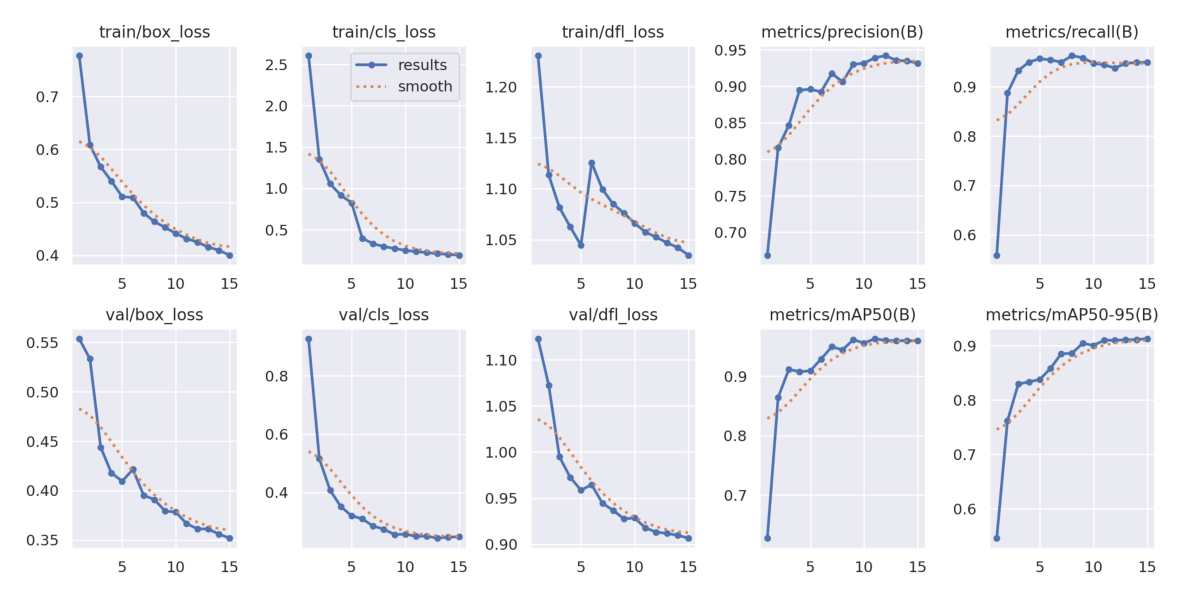

In [ ]:
#Training Result
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15,15))
image = mpimg.imread("/content/runs/detect/train/results.png")

plt.imshow(image)
plt.axis('off')

(np.float64(-0.5), np.float64(1791.5), np.float64(1407.5), np.float64(-0.5))

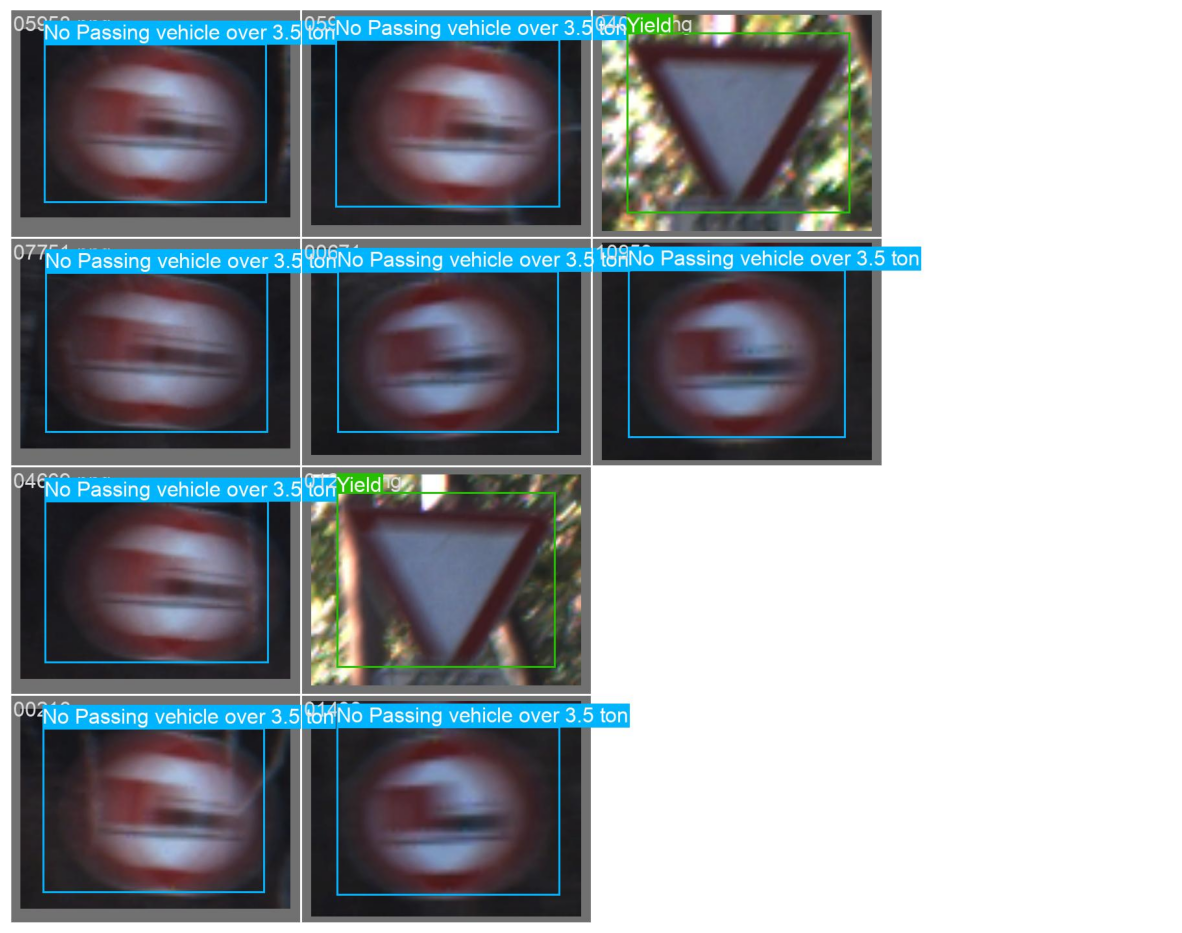

In [ ]:
plt.figure(figsize=(15,15))
image = mpimg.imread("/content/runs/detect/train/val_batch0_labels.jpg")

plt.imshow(image)
plt.axis('off')

(np.float64(-0.5), np.float64(1791.5), np.float64(1535.5), np.float64(-0.5))

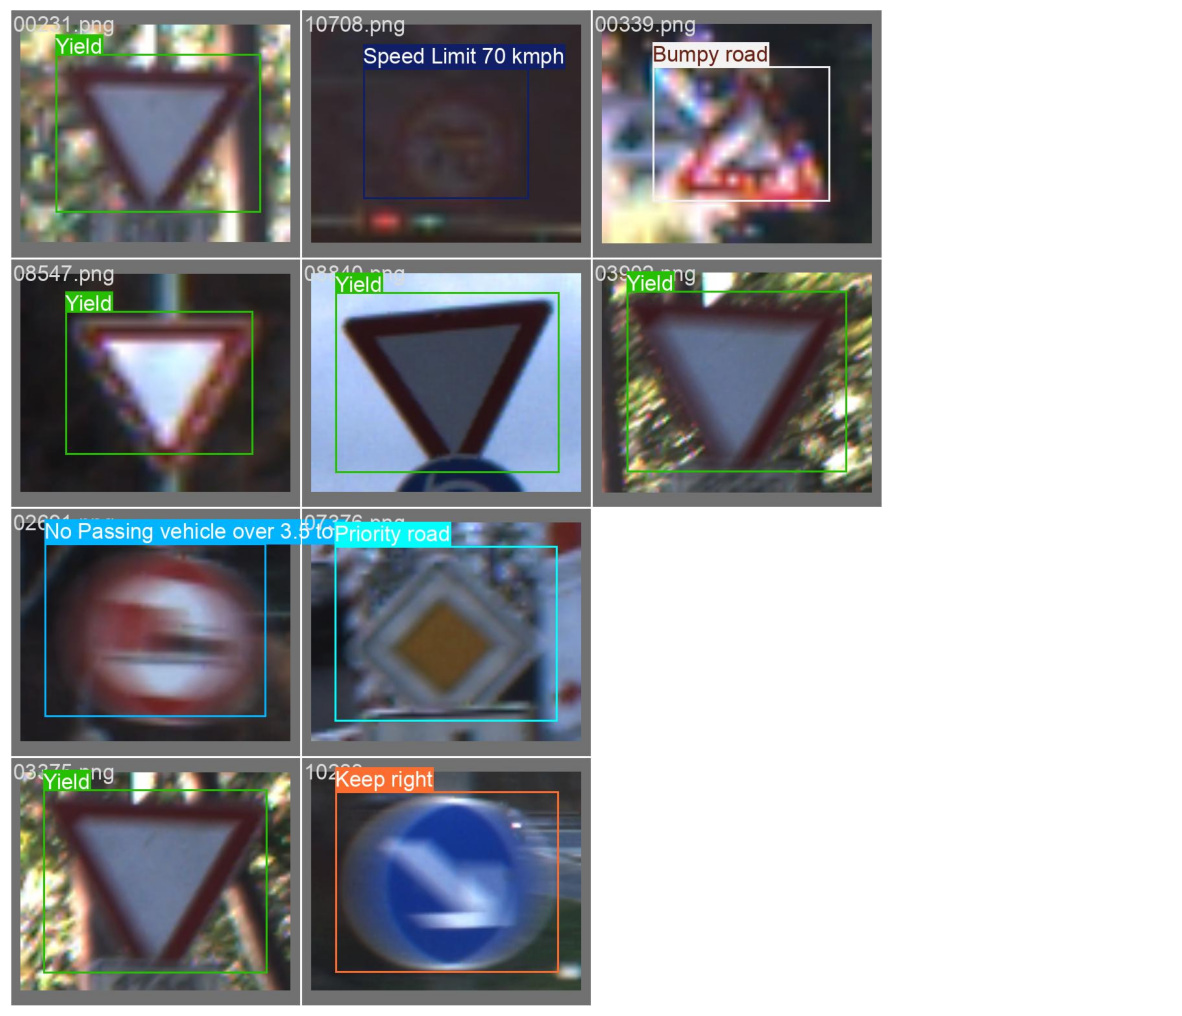

In [ ]:
plt.figure(figsize=(15,15))
image = mpimg.imread("/content/runs/detect/train/val_batch1_labels.jpg")

plt.imshow(image)
plt.axis('off')

(np.float64(-0.5), np.float64(1791.5), np.float64(1535.5), np.float64(-0.5))

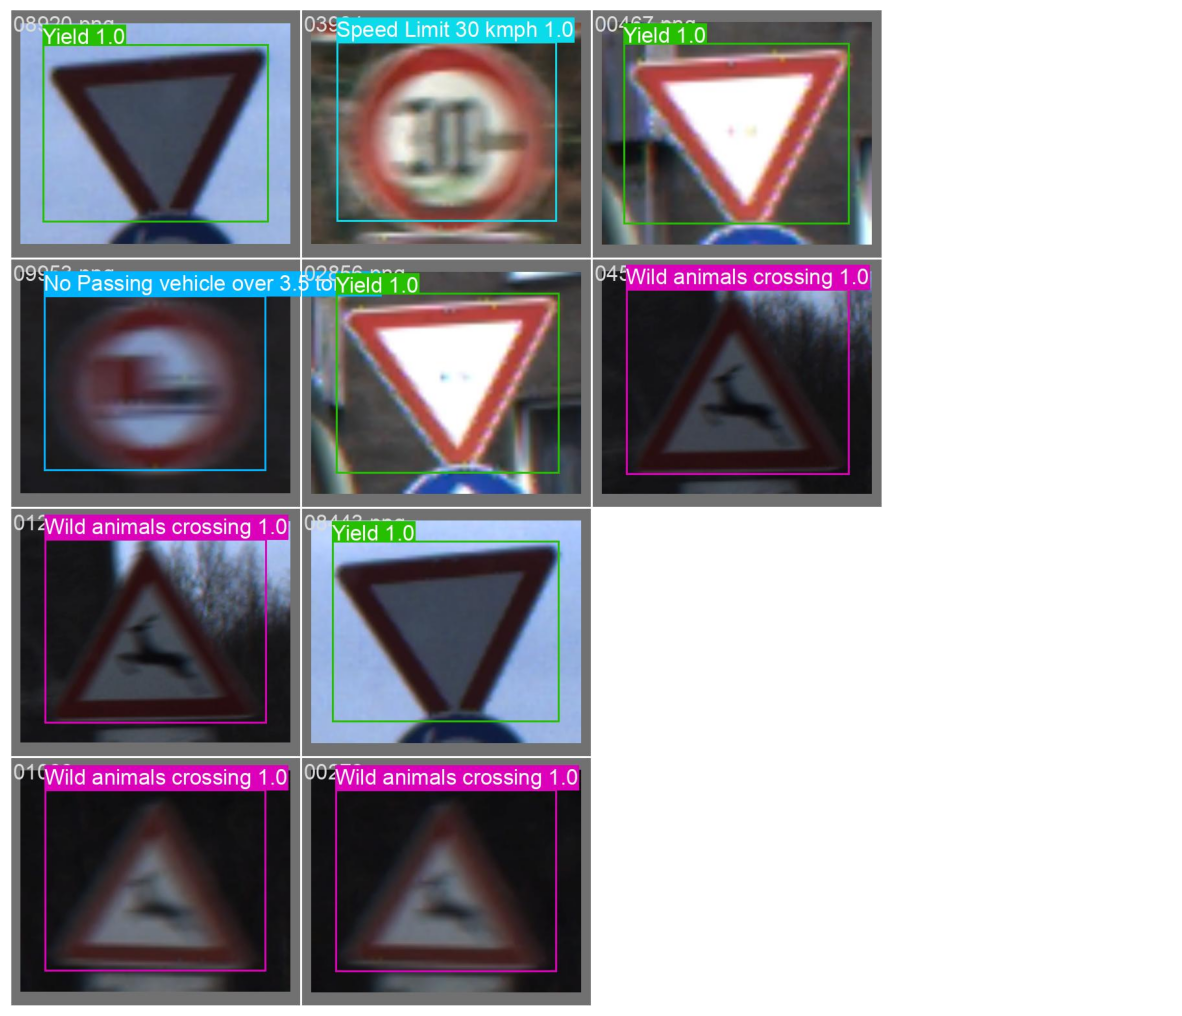

In [ ]:
plt.figure(figsize=(15,15))
image = mpimg.imread("/content/runs/detect/train/val_batch2_pred.jpg")

plt.imshow(image)
plt.axis('off')

(np.float64(-0.5), np.float64(2999.5), np.float64(2249.5), np.float64(-0.5))

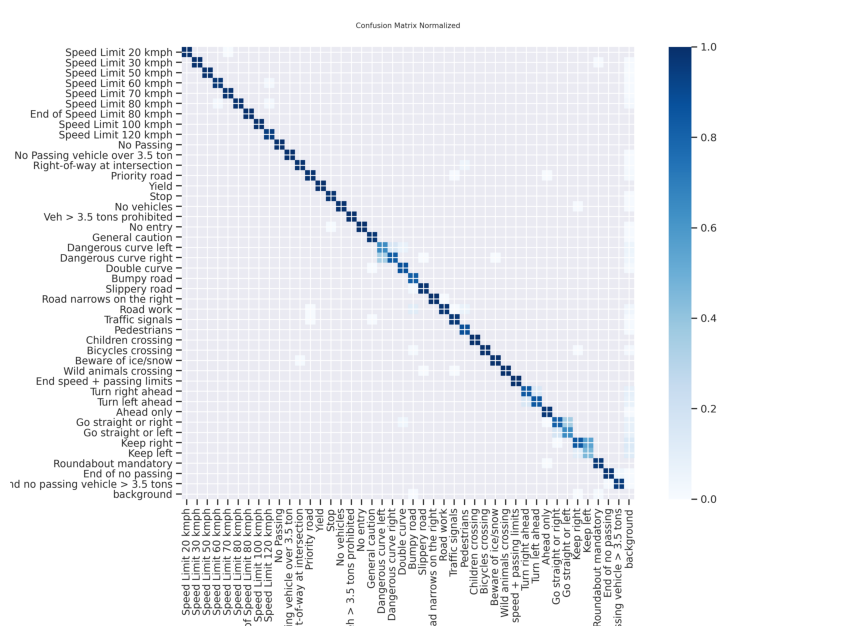

In [ ]:
#Training Result
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20,8))
image = mpimg.imread("/content/runs/detect/train/confusion_matrix_normalized.png")

plt.imshow(image)
plt.axis('off')